In [ ]:
pip install covidcast

     |████████████████████████████████| 12.3MB 282kB/s 
     |████████████████████████████████| 1.0MB 40.6MB/s 
     |████████████████████████████████| 26.9MB 1.8MB/s 
     |████████████████████████████████| 15.3MB 340kB/s 
     |████████████████████████████████| 6.5MB 45.6MB/s 
     |████████████████████████████████| 1.3MB 42.3MB/s 
     |████████████████████████████████| 143kB 45.4MB/s 
     |████████████████████████████████| 296kB 49.9MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import covidcast
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_counties = pd.read_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/counties (2).csv')
all_counties_CA = all_counties[all_counties['state']=='CA']
counties_CA = all_counties_CA[['county','population','metrics.caseDensity','metrics.infectionRate','actuals.cases','actuals.deaths','actuals.newCases','actuals.newDeaths','metrics.vaccinationsInitiatedRatio','metrics.vaccinationsCompletedRatio','actuals.vaccinesAdministered']]
counties_CA.to_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/vaccine.csv')

In [ ]:
counties_CA

,county,population,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,actuals.newDeaths,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.vaccinesAdministered
186,Alameda County,1671329,7.487626,1.065896,85110,1475.0,80,0.0,0.469295,0.305817,1214027.0
187,Alpine County,1129,0.000000,NaN,85,0.0,0,0.0,0.725421,0.509300,1390.0
188,Amador County,39752,7.546790,0.793598,3615,46.0,3,0.0,0.400961,0.217398,24024.0
189,Butte County,219186,7.495265,0.985023,11529,196.0,16,0.0,0.330993,0.237387,119974.0
190,Calaveras County,45905,5.446030,0.752266,2039,50.0,2,0.0,0.365755,0.237904,27237.0
191,Colusa County,21547,9.282035,1.322013,2192,16.0,0,0.0,0.304590,0.193484,10168.0
192,Contra Costa County,1153526,8.929144,1.096377,66839,781.0,89,0.0,0.499459,0.307065,896526.0
193,Del Norte County,27812,14.895934,0.655695,1274,7.0,2,0.0,0.284805,0.182439,12442.0
194,El Dorado County,192843,9.334018,1.078712,9639,106.0,14,0.0,0.359137,0.241933,111988.0
195,Fresno County,999101,7.092090,0.833609,100431,1642.0,55,2.0,0.346967,0.219412,541024.0


In [ ]:
med_income = pd.read_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/Median Household Income by County.csv')
med_income = med_income.rename(columns={"Median Household Income by County": "county", "Unnamed: 1": "median household income"})
med_income = med_income.drop(0).drop(columns=['Unnamed: 2'])
counties_CA = counties_CA.join(med_income.set_index('county'), on='county').dropna()
counties_CA

,county,population,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,median household income
186,Alameda County,1671329,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,"$99,406"
188,Amador County,39752,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,"$62,772"
189,Butte County,219186,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,"$52,537"
190,Calaveras County,45905,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,"$63,158"
191,Colusa County,21547,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,"$59,401"
192,Contra Costa County,1153526,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,"$99,716"
193,Del Norte County,27812,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,"$45,283"
194,El Dorado County,192843,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,"$83,377"
195,Fresno County,999101,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,"$53,969"
196,Glenn County,28393,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,"$49,633"


In [ ]:
president = pd.read_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/president_county_candidate.csv')
president_CA=president[president['state']=='California']
total_votes = president_CA.groupby('county').sum()
total_votes['county']=np.unique(president_CA['county'])
total_votes = total_votes[['county','total_votes']]
counties = np.unique(president_CA['county'])
dem = []
rep = []
for i in range (len(counties)):
  c = president_CA[president_CA['county']== counties[i]]
  dem.append(c[c['party']=='DEM']['total_votes'].iloc[0])
  rep.append(c[c['party']=='REP']['total_votes'].iloc[0])
pres_CA = pd.DataFrame()
pres_CA['county']=counties
pres_CA['democrat votes']= np.array(dem)
pres_CA['republican votes'] = np.array(rep)
pres_CA['total votes'] = np.array([i for i in total_votes['total_votes']])
pres_CA['% democrat'] = pres_CA['democrat votes']/pres_CA['total votes']
pres_CA['% republican'] = pres_CA['republican votes']/pres_CA['total votes']


In [ ]:
counties_CA = counties_CA.join(pres_CA.set_index('county'), on='county').dropna()
counties_CA

,county,population,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,median household income,democrat votes,republican votes,total votes,% democrat,% republican
186,Alameda County,1671329,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,"$99,406",617659,136309,769864,0.802296,0.177056
188,Amador County,39752,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,"$62,772",8153,13585,22302,0.365573,0.609138
189,Butte County,219186,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,"$52,537",50426,48730,102042,0.494169,0.477548
190,Calaveras County,45905,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,"$63,158",10046,16518,27164,0.369828,0.608084
191,Colusa County,21547,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,"$59,401",3234,4554,7951,0.406741,0.572758
192,Contra Costa County,1153526,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,"$99,716",416386,152877,581230,0.716388,0.263023
193,Del Norte County,27812,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,"$45,283",4677,6461,11452,0.408400,0.564181
194,El Dorado County,192843,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,"$83,377",51621,61838,116138,0.444480,0.532453
195,Fresno County,999101,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,"$53,969",193025,164464,364809,0.529112,0.450822
196,Glenn County,28393,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,"$49,633",3995,7063,11292,0.353790,0.625487


In [ ]:
pop_dens = pd.read_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/Population Density.csv')
pop_dens['County']=np.array([pop_dens['County'].iloc[i][1:] for i in range (len(pop_dens))])
counties_CA = counties_CA.join(pop_dens.set_index('County'), on='county').dropna()
counties_CA

,county,population,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,median household income,democrat votes,republican votes,total votes,% democrat,% republican,Population (2019),Area (sq mile),Population Density
186,Alameda County,1671329,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,"$99,406",617659,136309,769864,0.802296,0.177056,"1,671,329",738,2264.67
188,Amador County,39752,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,"$62,772",8153,13585,22302,0.365573,0.609138,"39,752",593,67.04
189,Butte County,219186,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,"$52,537",50426,48730,102042,0.494169,0.477548,"219,186","1,640",133.65
190,Calaveras County,45905,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,"$63,158",10046,16518,27164,0.369828,0.608084,"45,905","1,020",45.00
191,Colusa County,21547,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,"$59,401",3234,4554,7951,0.406741,0.572758,"21,547","1,151",18.72
192,Contra Costa County,1153526,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,"$99,716",416386,152877,581230,0.716388,0.263023,"1,153,526",720,1602.12
193,Del Norte County,27812,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,"$45,283",4677,6461,11452,0.408400,0.564181,"27,812","1,008",27.59
194,El Dorado County,192843,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,"$83,377",51621,61838,116138,0.444480,0.532453,"192,843","1,712",112.64
195,Fresno County,999101,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,"$53,969",193025,164464,364809,0.529112,0.450822,"999,101","5,963",167.55
196,Glenn County,28393,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,"$49,633",3995,7063,11292,0.353790,0.625487,"28,393","1,315",21.59


In [ ]:
counties = ['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
'Calaveras County', 'Colusa County', 'Contra Costa County','Del Norte County',
 'El Dorado County','Fresno County', 'Glenn County', 'Humboldt County',
'Imperial County', 'Inyo County', 'Kern County', 'Kings County', 'Lake County',
'Lassen County', 'Los Angeles County', 'Madera County', 'Marin County',
'Mariposa County', 'Mendocino County', 'Merced County', 'Modoc County', 'Mono County',
'Monterey County','Napa County','Nevada County', 'Orange County', 'Placer County',
 'Plumas County', 'Riverside County', 'Sacramento County', 'San Benito County',
 'San Bernardino County', 'San Diego County', 'San Francisco County', 'San Joaquin County',
 'San Luis Obispo County', 'San Mateo County', 'Santa Barbara County',
 'Santa Clara County', 'Santa Cruz County', 'Shasta County', 'Sierra County',
 'Siskiyou County', 'Solano County', 'Sonoma County', 'Stanislaus County',
 'Sutter County', 'Tehama County', 'Trinity County', 'Tulare County',
 'Tuolumne County', 'Ventura County', 'Yolo County', 'Yuba County']



#Did not inclue unknown/unidentified due to tediosity of adding data by hand
female_percent = np.array([.586, .481, .569, .592, .558, .558, .587, .543, .57, .574,
.583, .597, .572, .545, .568, .558, .557, .532, .577, .563, .583, .559, .547,
.579, .527, .483, .569, .542, .579, .572, .586, .546, .565, .593, .588, .586, 
.582, .552, .592, .572, .584, .587, .584, .586, .579, .529, .559, .593, .582,
.578, .574, .563, .506, .563, .556, .579, .573, .587])

male_percent = 1 - female_percent 


d = {'Counties': counties, 'Female Percent': female_percent, 'Male Percent': male_percent}
gender_by_county_df = pd.DataFrame(data=d)
counties_CA = counties_CA.join(gender_by_county_df.set_index('Counties'), on='county').dropna()
counties_CA

,county,population,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,median household income,democrat votes,republican votes,total votes,% democrat,% republican,Population (2019),Area (sq mile),Population Density,Female Percent,Male Percent
186,Alameda County,1671329,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,"$99,406",617659,136309,769864,0.802296,0.177056,"1,671,329",738,2264.67,0.586,0.414
188,Amador County,39752,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,"$62,772",8153,13585,22302,0.365573,0.609138,"39,752",593,67.04,0.569,0.431
189,Butte County,219186,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,"$52,537",50426,48730,102042,0.494169,0.477548,"219,186","1,640",133.65,0.592,0.408
190,Calaveras County,45905,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,"$63,158",10046,16518,27164,0.369828,0.608084,"45,905","1,020",45.00,0.558,0.442
191,Colusa County,21547,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,"$59,401",3234,4554,7951,0.406741,0.572758,"21,547","1,151",18.72,0.558,0.442
192,Contra Costa County,1153526,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,"$99,716",416386,152877,581230,0.716388,0.263023,"1,153,526",720,1602.12,0.587,0.413
193,Del Norte County,27812,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,"$45,283",4677,6461,11452,0.408400,0.564181,"27,812","1,008",27.59,0.543,0.457
194,El Dorado County,192843,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,"$83,377",51621,61838,116138,0.444480,0.532453,"192,843","1,712",112.64,0.570,0.430
195,Fresno County,999101,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,"$53,969",193025,164464,364809,0.529112,0.450822,"999,101","5,963",167.55,0.574,0.426
196,Glenn County,28393,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,"$49,633",3995,7063,11292,0.353790,0.625487,"28,393","1,315",21.59,0.583,0.417


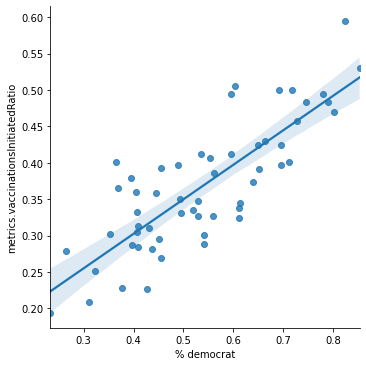

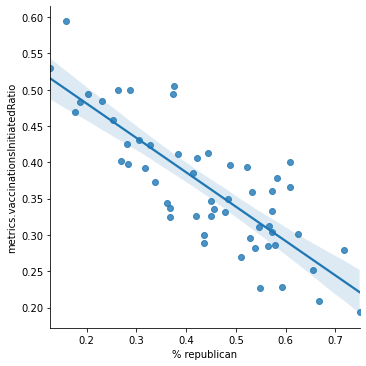

In [ ]:
sns.lmplot(x='% democrat',y='metrics.vaccinationsInitiatedRatio', data=counties_CA)
sns.lmplot(x='% republican',y='metrics.vaccinationsInitiatedRatio', data=counties_CA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


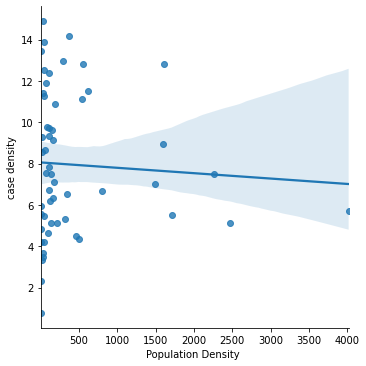

In [ ]:
from scipy import stats

pop_dens = counties_CA[['county','Population Density ','metrics.vaccinationsInitiatedRatio']]
pop_dens['z score'] = np.abs(stats.zscore(counties_CA['Population Density ']))
pop_dens['case density'] = counties_CA['metrics.caseDensity']
pop_dens=pop_dens.drop(pop_dens[pop_dens['z score']>3].index)
sns.lmplot(x='Population Density ',y='case density', data=pop_dens)

In [ ]:
race = pd.read_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/Race.csv')
race = race.rename(columns={'County':'County', 'White':'White', 'Asian':'Asian', 'Black or African \nAmerican':'Black',
       'Native American':'Native American', 'Hispanic ':'Hispanic', 'Other':'Other'}).drop(0)
for i in range(len(race)):
  race['County'].iloc[i] = race['County'].iloc[i]+' County'
race

,County,White,Asian,Black,Native American,Hispanic,Other
1,Alameda County,46.20%,26.20%,12.50%,1.30%,22.20%,13.90%
2,Alpine County,66.10%,3.30%,0.00%,22.10%,7.00%,8.50%
3,Amador County,87.50%,1.40%,2.30%,2.50%,12.20%,6.30%
4,Butte County,83.30%,4.20%,1.50%,1.40%,13.90%,9.60%
5,Calaveras County,91.00%,1.30%,1.10%,1.30%,10.20%,5.30%
6,Colusa County,68.00%,1.20%,1.00%,1.50%,53.80%,28.30%
7,Contra Costa County,63.20%,14.30%,9.10%,0.90%,23.90%,12.50%
8,Del Norte County,72.80%,3.10%,3.30%,6.40%,17.50%,14.30%
9,El Dorado County,87.80%,3.50%,0.80%,1.10%,11.80%,6.90%
10,Fresno County,60.00%,9.50%,5.10%,1.10%,49.80%,24.30%


In [ ]:
counties_CA = counties_CA.join(race.set_index('County'), on='county')
counties_CA

,county,population,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,median household income,democrat votes,republican votes,total votes,% democrat,% republican,Population (2019),Area (sq mile),Population Density,Female Percent,Male Percent,White,Asian,Black,Native American,Hispanic,Other
186,Alameda County,1671329,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,"$99,406",617659,136309,769864,0.802296,0.177056,"1,671,329",738,2264.67,0.586,0.414,46.20%,26.20%,12.50%,1.30%,22.20%,13.90%
188,Amador County,39752,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,"$62,772",8153,13585,22302,0.365573,0.609138,"39,752",593,67.04,0.569,0.431,87.50%,1.40%,2.30%,2.50%,12.20%,6.30%
189,Butte County,219186,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,"$52,537",50426,48730,102042,0.494169,0.477548,"219,186","1,640",133.65,0.592,0.408,83.30%,4.20%,1.50%,1.40%,13.90%,9.60%
190,Calaveras County,45905,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,"$63,158",10046,16518,27164,0.369828,0.608084,"45,905","1,020",45.00,0.558,0.442,91.00%,1.30%,1.10%,1.30%,10.20%,5.30%
191,Colusa County,21547,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,"$59,401",3234,4554,7951,0.406741,0.572758,"21,547","1,151",18.72,0.558,0.442,68.00%,1.20%,1.00%,1.50%,53.80%,28.30%
192,Contra Costa County,1153526,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,"$99,716",416386,152877,581230,0.716388,0.263023,"1,153,526",720,1602.12,0.587,0.413,63.20%,14.30%,9.10%,0.90%,23.90%,12.50%
193,Del Norte County,27812,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,"$45,283",4677,6461,11452,0.408400,0.564181,"27,812","1,008",27.59,0.543,0.457,72.80%,3.10%,3.30%,6.40%,17.50%,14.30%
194,El Dorado County,192843,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,"$83,377",51621,61838,116138,0.444480,0.532453,"192,843","1,712",112.64,0.570,0.430,87.80%,3.50%,0.80%,1.10%,11.80%,6.90%
195,Fresno County,999101,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,"$53,969",193025,164464,364809,0.529112,0.450822,"999,101","5,963",167.55,0.574,0.426,60.00%,9.50%,5.10%,1.10%,49.80%,24.30%
196,Glenn County,28393,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,"$49,633",3995,7063,11292,0.353790,0.625487,"28,393","1,315",21.59,0.583,0.417,78.30%,2.30%,0.90%,2.80%,36.60%,15.70%


In [ ]:
for i in range (len(counties_CA)):
  counties_CA['White'].iloc[i]=counties_CA['White'].iloc[i][:-1]
  counties_CA['Black'].iloc[i]=counties_CA['Black'].iloc[i][:-1]
  counties_CA['Asian'].iloc[i]=counties_CA['Asian'].iloc[i][:-1]
  counties_CA['Hispanic'].iloc[i]=counties_CA['Hispanic'].iloc[i][:-1]
  counties_CA['Native American'].iloc[i]=counties_CA['Native American'].iloc[i][:-1]
  counties_CA['Other'].iloc[i]=counties_CA['Other'].iloc[i][:-1]

counties_CA['White']= pd.to_numeric(counties_CA["White"])/100
counties_CA['Black']= pd.to_numeric(counties_CA["Black"])/100
counties_CA['Asian']= pd.to_numeric(counties_CA["Asian"])/100
counties_CA['Hispanic']= pd.to_numeric(counties_CA["Hispanic"])/100
counties_CA['Other']= pd.to_numeric(counties_CA["Other"])/100
counties_CA['Native American']= pd.to_numeric(counties_CA["Native American"])/100

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


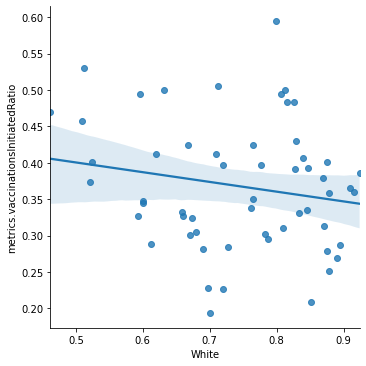

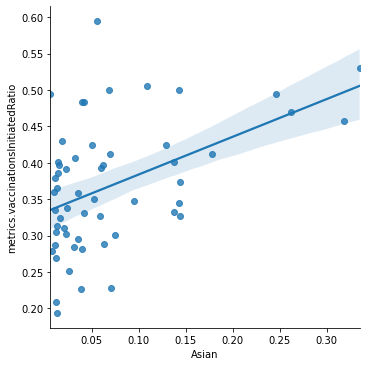

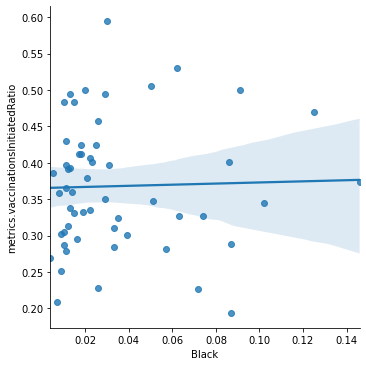

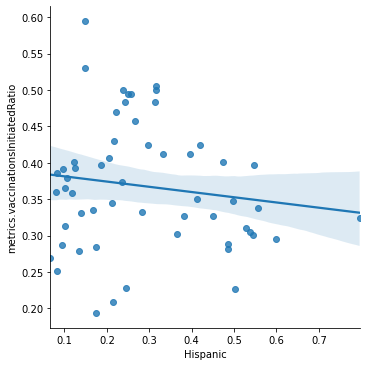

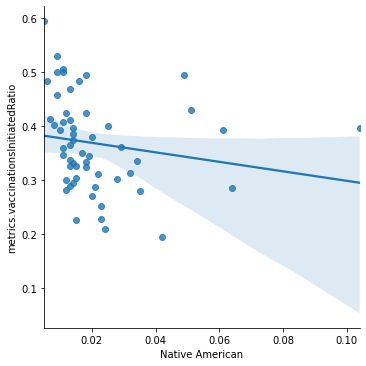

In [ ]:
sns.lmplot(x='White',y='metrics.vaccinationsInitiatedRatio',data=counties_CA)
sns.lmplot(x='Asian',y='metrics.vaccinationsInitiatedRatio',data=counties_CA)
sns.lmplot(x='Black',y='metrics.vaccinationsInitiatedRatio',data=counties_CA)
sns.lmplot(x='Hispanic',y='metrics.vaccinationsInitiatedRatio',data=counties_CA)
sns.lmplot(x='Native American',y='metrics.vaccinationsInitiatedRatio',data=counties_CA)

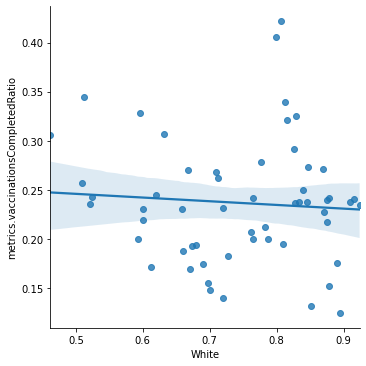

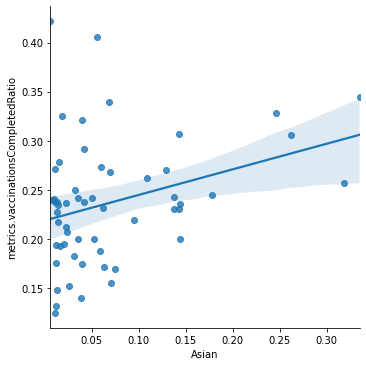

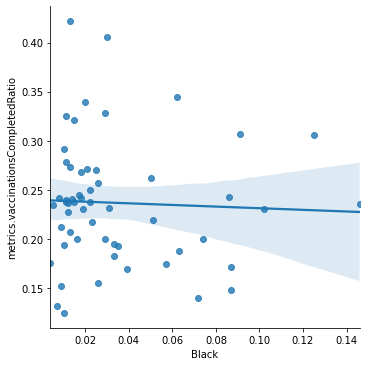

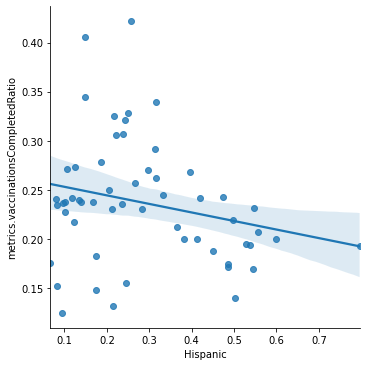

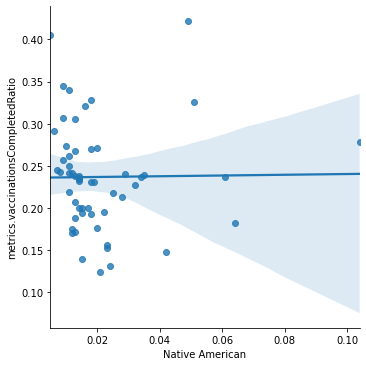

In [ ]:
sns.lmplot(x='White',y='metrics.vaccinationsCompletedRatio',data=counties_CA)
sns.lmplot(x='Asian',y='metrics.vaccinationsCompletedRatio',data=counties_CA)
sns.lmplot(x='Black',y='metrics.vaccinationsCompletedRatio',data=counties_CA)
sns.lmplot(x='Hispanic',y='metrics.vaccinationsCompletedRatio',data=counties_CA)
sns.lmplot(x='Native American',y='metrics.vaccinationsCompletedRatio',data=counties_CA)

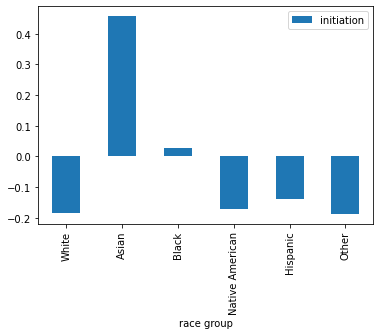

In [ ]:
race_arr = np.array(['White','Asian','Black','Native American','Hispanic','Other'])
race_initiate = np.array([np.corrcoef(counties_CA['White'],counties_CA['metrics.vaccinationsInitiatedRatio'])[0][1],
                         np.corrcoef(counties_CA['Asian'],counties_CA['metrics.vaccinationsInitiatedRatio'])[0][1],
                         np.corrcoef(counties_CA['Black'],counties_CA['metrics.vaccinationsInitiatedRatio'])[0][1],
                         np.corrcoef(counties_CA['Native American'],counties_CA['metrics.vaccinationsInitiatedRatio'])[0][1],
                         np.corrcoef(counties_CA['Hispanic'],counties_CA['metrics.vaccinationsInitiatedRatio'])[0][1],
                         np.corrcoef(counties_CA['Other'],counties_CA['metrics.vaccinationsInitiatedRatio'])[0][1]])
race_complete = np.array([np.corrcoef(counties_CA['White'],counties_CA['metrics.vaccinationsCompletedRatio'])[0][1],
                         np.corrcoef(counties_CA['Asian'],counties_CA['metrics.vaccinationsCompletedRatio'])[0][1],
                         np.corrcoef(counties_CA['Black'],counties_CA['metrics.vaccinationsCompletedRatio'])[0][1],
                         np.corrcoef(counties_CA['Native American'],counties_CA['metrics.vaccinationsCompletedRatio'])[0][1],
                         np.corrcoef(counties_CA['Hispanic'],counties_CA['metrics.vaccinationsCompletedRatio'])[0][1],
                         np.corrcoef(counties_CA['Other'],counties_CA['metrics.vaccinationsCompletedRatio'])[0][1]])
race_analysis = pd.DataFrame(data={'race group':race_arr,'initiation':race_initiate,'completion':race_complete})
race_analysis.sort_values(['initiation'],ascending=False)
race_analysis.plot.bar(x='race group',y='initiation')

In [ ]:
counties_CA.columns

Index(['county', 'population', 'metrics.caseDensity', 'metrics.infectionRate',
       'actuals.cases', 'actuals.deaths', 'actuals.newCases',
       'metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'median household income',
       'democrat votes', 'republican votes', 'total votes', '% democrat',
       '% republican', 'Population (2019)', 'Area  (sq mile)',
       'Population Density ', 'Female Percent', 'Male Percent', 'White',
       'Asian', 'Black', 'Native American', 'Hispanic', 'Other'],
      dtype='object')

In [ ]:
risk = counties_CA[['county','population','Population Density ','actuals.newCases','metrics.caseDensity','metrics.infectionRate','metrics.vaccinationsInitiatedRatio']]
risk['new per total population']=risk['actuals.newCases']/risk['population']
risk.sort_values(['metrics.infectionRate'],ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,population,Population Density,actuals.newCases,metrics.caseDensity,metrics.infectionRate,metrics.vaccinationsInitiatedRatio,new per total population
229,Santa Cruz County,273213,612.59,59,11.503322,1.329073,0.483231,0.000216
191,Colusa County,21547,18.72,0,9.282035,1.322013,0.304590,0.000000
200,Kern County,900202,110.56,116,12.378174,1.172872,0.282031,0.000129
232,Siskiyou County,43539,6.93,8,13.452635,1.140443,0.312616,0.000184
218,Riverside County,2470546,342.75,137,6.505213,1.116017,0.326676,0.000055
219,Sacramento County,1552058,1606.69,201,12.794073,1.113974,0.344322,0.000130
233,Solano County,447643,540.63,71,11.105789,1.097537,0.373637,0.000159
192,Contra Costa County,1153526,1602.12,89,8.929144,1.096377,0.499459,0.000077
216,Placer County,398329,283.71,65,12.982807,1.091970,0.393396,0.000163
238,Trinity County,12285,3.86,0,2.325717,1.089070,0.269597,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


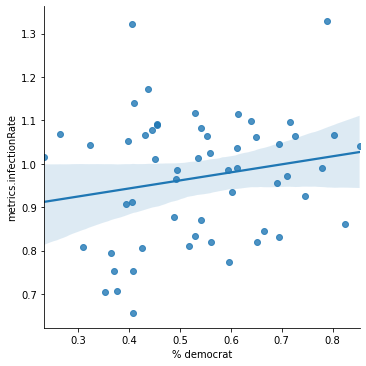

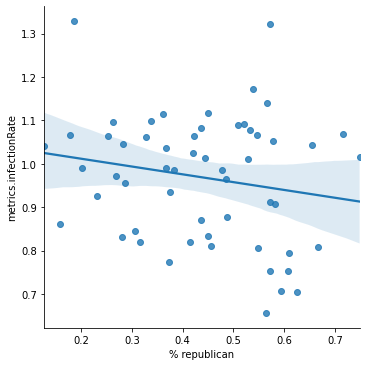

In [ ]:
sns.lmplot('% democrat','metrics.infectionRate',data=counties_CA)
sns.lmplot('% republican','metrics.infectionRate',data=counties_CA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


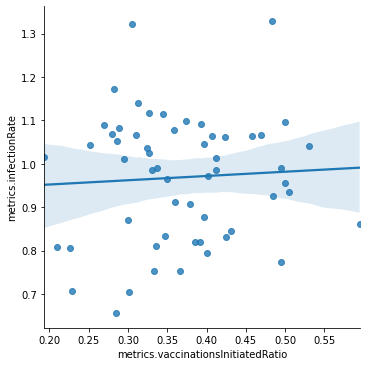

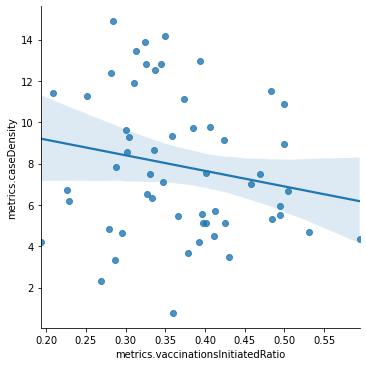

In [ ]:
sns.lmplot('metrics.vaccinationsInitiatedRatio','metrics.infectionRate',data=counties_CA)
sns.lmplot('metrics.vaccinationsInitiatedRatio','metrics.caseDensity',data=counties_CA)

In [ ]:
income = []
for i in range(len(counties_CA)):
  income.append(float(counties_CA['median household income'].iloc[i][1:].replace(',','')))
income = np.array(income)
counties_CA['median household income'] = income

In [ ]:
counties_CA['normalized income']=(counties_CA['median household income']-np.average(counties_CA['median household income']))/np.std(counties_CA['median household income'])
counties_CA['normalized democrat vote']=(counties_CA['% democrat']-np.average(counties_CA['% democrat']))/np.std(counties_CA['% democrat'])
counties_CA['normalized initiation']=(counties_CA['metrics.vaccinationsInitiatedRatio']-np.average(counties_CA['metrics.vaccinationsInitiatedRatio']))/np.std(counties_CA['metrics.vaccinationsInitiatedRatio'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


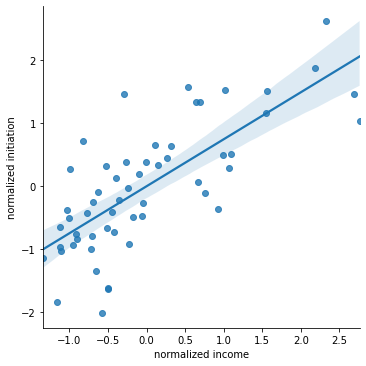

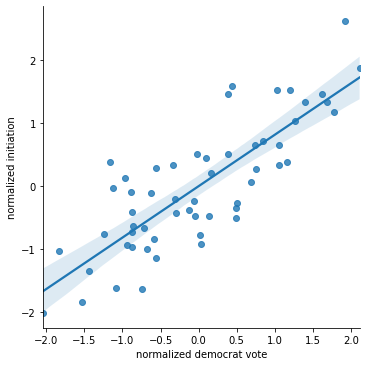

In [ ]:
sns.lmplot('normalized income','normalized initiation',data=counties_CA)
sns.lmplot('normalized democrat vote','normalized initiation',data=counties_CA)

In [ ]:
master_table = counties_CA[['county', 'population', 'Population Density ','metrics.caseDensity', 'metrics.infectionRate','actuals.cases', 'actuals.deaths', 'actuals.newCases','metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'median household income', '% democrat', '% republican', 'Female Percent', 'Male Percent', 'White', 'Asian', 'Black', 'Native American', 'Hispanic', 'Other']]
master_table

,county,population,Population Density,metrics.caseDensity,metrics.infectionRate,actuals.cases,actuals.deaths,actuals.newCases,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,median household income,% democrat,% republican,Female Percent,Male Percent,White,Asian,Black,Native American,Hispanic,Other
186,Alameda County,1671329,2264.67,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,99406.0,0.802296,0.177056,0.586,0.414,0.462,0.262,0.125,0.013,0.222,0.139
188,Amador County,39752,67.04,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,62772.0,0.365573,0.609138,0.569,0.431,0.875,0.014,0.023,0.025,0.122,0.063
189,Butte County,219186,133.65,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,52537.0,0.494169,0.477548,0.592,0.408,0.833,0.042,0.015,0.014,0.139,0.096
190,Calaveras County,45905,45.00,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,63158.0,0.369828,0.608084,0.558,0.442,0.910,0.013,0.011,0.013,0.102,0.053
191,Colusa County,21547,18.72,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,59401.0,0.406741,0.572758,0.558,0.442,0.680,0.012,0.010,0.015,0.538,0.283
192,Contra Costa County,1153526,1602.12,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,99716.0,0.716388,0.263023,0.587,0.413,0.632,0.143,0.091,0.009,0.239,0.125
193,Del Norte County,27812,27.59,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,45283.0,0.408400,0.564181,0.543,0.457,0.728,0.031,0.033,0.064,0.175,0.143
194,El Dorado County,192843,112.64,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,83377.0,0.444480,0.532453,0.570,0.430,0.878,0.035,0.008,0.011,0.118,0.069
195,Fresno County,999101,167.55,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,53969.0,0.529112,0.450822,0.574,0.426,0.600,0.095,0.051,0.011,0.498,0.243
196,Glenn County,28393,21.59,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,49633.0,0.353790,0.625487,0.583,0.417,0.783,0.023,0.009,0.028,0.366,0.157


In [ ]:
master_table = master_table[['county', 'population', 'Population Density ', 'metrics.caseDensity',
       'metrics.infectionRate', 'actuals.cases', 'actuals.deaths',
       'actuals.newCases', 'metrics.vaccinationsInitiatedRatio',
       'metrics.vaccinationsCompletedRatio', 'median household income',
       '% democrat', '% republican', 'Female Percent', 'Male Percent', 'White',
       'Asian', 'Black', 'Native American', 'Hispanic', 'Other']].rename(columns={'Population Density ':'population density', 'metrics.caseDensity':'case density',
       'metrics.infectionRate':'infection rate', 'actuals.cases':'actual cases', 'actuals.deaths':'actual deaths',
       'actuals.newCases':'new cases', 'metrics.vaccinationsInitiatedRatio':'vaccine initiation ratio',
       'metrics.vaccinationsCompletedRatio':'vaccine completion ratio', 
       'Female Percent':'% female', 'Male Percent':'% male', 'White':'% white',
       'Asian':'% asian', 'Black':'% black', 'Native American':'% native american', 'Hispanic':'% hispanic', 'Other':'% other'
       })
master_table

,county,population,population density,case density,infection rate,actual cases,actual deaths,new cases,vaccine initiation ratio,vaccine completion ratio,median household income,% democrat,% republican,% female,% male,% white,% asian,% black,% native american,% hispanic,% other
186,Alameda County,1671329,2264.67,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,99406.0,0.802296,0.177056,0.586,0.414,0.462,0.262,0.125,0.013,0.222,0.139
188,Amador County,39752,67.04,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,62772.0,0.365573,0.609138,0.569,0.431,0.875,0.014,0.023,0.025,0.122,0.063
189,Butte County,219186,133.65,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,52537.0,0.494169,0.477548,0.592,0.408,0.833,0.042,0.015,0.014,0.139,0.096
190,Calaveras County,45905,45.00,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,63158.0,0.369828,0.608084,0.558,0.442,0.910,0.013,0.011,0.013,0.102,0.053
191,Colusa County,21547,18.72,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,59401.0,0.406741,0.572758,0.558,0.442,0.680,0.012,0.010,0.015,0.538,0.283
192,Contra Costa County,1153526,1602.12,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,99716.0,0.716388,0.263023,0.587,0.413,0.632,0.143,0.091,0.009,0.239,0.125
193,Del Norte County,27812,27.59,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,45283.0,0.408400,0.564181,0.543,0.457,0.728,0.031,0.033,0.064,0.175,0.143
194,El Dorado County,192843,112.64,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,83377.0,0.444480,0.532453,0.570,0.430,0.878,0.035,0.008,0.011,0.118,0.069
195,Fresno County,999101,167.55,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,53969.0,0.529112,0.450822,0.574,0.426,0.600,0.095,0.051,0.011,0.498,0.243
196,Glenn County,28393,21.59,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,49633.0,0.353790,0.625487,0.583,0.417,0.783,0.023,0.009,0.028,0.366,0.157


In [ ]:
ca_counties = covidcast.fips_to_name("^06.*", ties_method="all")
ca_counties = ca_counties[0]
counties_list = ["06001", "06003", "06005", "06007", "06009", "06011", "06013", "06015", "06017", "06019", "06021", "06023", "06025", "06027", "06029", "06031", "06033", "06035", "06037", "06039", "06041", "06043", "06045", "06047", "06049",
                 "06051", "06053", "06055", "06057", "06059", "06061", "06063", "06065", "06067", "06069", "06071", "06073", "06075", "06077", "06079", "06081", "06083", "06085", "06087", "06089", "06091", "06093", "06095", "06097", "06099", 
                 "06101", "06103", "06105", "06107", "06109", "06111", "06113", "06115"]
county_names = np.array([ca_counties[i][0] for i in counties_list])
fips = pd.DataFrame()
fips['geo_value'] = counties_list
fips['county'] = county_names
ca_vaccine_acceptance = covidcast.signal("fb-survey", "smoothed_covid_vaccinated_or_accept",
                        date(2021, 3, 14), date(2021, 4, 14),
                        "county", counties_list)
ca_vaccine_acceptance = ca_vaccine_acceptance.groupby(['geo_value']).agg(np.average).reset_index().rename(columns={"value": "COVID vaccine acceptance rate (30 days moving average)"})[['geo_value',"COVID vaccine acceptance rate (30 days moving average)"]]
indicators = pd.merge(fips,ca_vaccine_acceptance,on='geo_value',how='outer').drop('geo_value',axis=1)
master_table = pd.merge(master_table,indicators,on='county')
master_table

,county,population,population density,case density,infection rate,actual cases,actual deaths,new cases,vaccine initiation ratio,vaccine completion ratio,median household income,% democrat,% republican,% female,% male,% white,% asian,% black,% native american,% hispanic,% other,COVID vaccine acceptance rate (30 days moving average)
0,Alameda County,1671329,2264.67,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,99406.0,0.802296,0.177056,0.586,0.414,0.462,0.262,0.125,0.013,0.222,0.139,94.140452
1,Amador County,39752,67.04,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,62772.0,0.365573,0.609138,0.569,0.431,0.875,0.014,0.023,0.025,0.122,0.063,NaN
2,Butte County,219186,133.65,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,52537.0,0.494169,0.477548,0.592,0.408,0.833,0.042,0.015,0.014,0.139,0.096,85.803017
3,Calaveras County,45905,45.00,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,63158.0,0.369828,0.608084,0.558,0.442,0.910,0.013,0.011,0.013,0.102,0.053,NaN
4,Colusa County,21547,18.72,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,59401.0,0.406741,0.572758,0.558,0.442,0.680,0.012,0.010,0.015,0.538,0.283,NaN
5,Contra Costa County,1153526,1602.12,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,99716.0,0.716388,0.263023,0.587,0.413,0.632,0.143,0.091,0.009,0.239,0.125,92.745686
6,Del Norte County,27812,27.59,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,45283.0,0.408400,0.564181,0.543,0.457,0.728,0.031,0.033,0.064,0.175,0.143,NaN
7,El Dorado County,192843,112.64,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,83377.0,0.444480,0.532453,0.570,0.430,0.878,0.035,0.008,0.011,0.118,0.069,81.646242
8,Fresno County,999101,167.55,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,53969.0,0.529112,0.450822,0.574,0.426,0.600,0.095,0.051,0.011,0.498,0.243,86.826937
9,Glenn County,28393,21.59,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,49633.0,0.353790,0.625487,0.583,0.417,0.783,0.023,0.009,0.028,0.366,0.157,NaN


In [ ]:
all_counties_age = pd.read_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/cc-est2019-agesex-06.csv')
CA_age = all_counties_age[all_counties_age['STNAME']=='California']
CA_age = CA_age[CA_age['YEAR']==12]
CA_age['% 65+'] = (CA_age['AGE6569_TOT']+CA_age['AGE7074_TOT']+CA_age['AGE7579_TOT']+CA_age['AGE85PLUS_TOT'])/CA_age['POPESTIMATE']
CA_age = CA_age[['CTYNAME','MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM', '% 65+']]
CA_age = CA_age.rename(columns={'CTYNAME':'county','MEDIAN_AGE_TOT':'overall median age', 'MEDIAN_AGE_MALE':'median age male', 'MEDIAN_AGE_FEM':'median age female'})
master_table = pd.merge(master_table,CA_age,on='county')
master_table

,county,population,population density,case density,infection rate,actual cases,actual deaths,new cases,vaccine initiation ratio,vaccine completion ratio,median household income,% democrat,% republican,% female,% male,% white,% asian,% black,% native american,% hispanic,% other,COVID vaccine acceptance rate (30 days moving average),overall median age,median age male,median age female,% 65+
0,Alameda County,1671329,2264.67,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,99406.0,0.802296,0.177056,0.586,0.414,0.462,0.262,0.125,0.013,0.222,0.139,94.140452,37.9,37.0,38.7,0.126785
1,Amador County,39752,67.04,7.546790,0.793598,3615,46.0,3,0.400961,0.217398,62772.0,0.365573,0.609138,0.569,0.431,0.875,0.014,0.023,0.025,0.122,0.063,NaN,50.3,47.7,54.2,0.244365
2,Butte County,219186,133.65,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,52537.0,0.494169,0.477548,0.592,0.408,0.833,0.042,0.015,0.014,0.139,0.096,85.803017,36.8,35.5,38.2,0.162707
3,Calaveras County,45905,45.00,5.446030,0.752266,2039,50.0,2,0.365755,0.237904,63158.0,0.369828,0.608084,0.558,0.442,0.910,0.013,0.011,0.013,0.102,0.053,NaN,51.9,50.6,53.1,0.247315
4,Colusa County,21547,18.72,9.282035,1.322013,2192,16.0,0,0.304590,0.193484,59401.0,0.406741,0.572758,0.558,0.442,0.680,0.012,0.010,0.015,0.538,0.283,NaN,35.3,34.7,35.9,0.132083
5,Contra Costa County,1153526,1602.12,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,99716.0,0.716388,0.263023,0.587,0.413,0.632,0.143,0.091,0.009,0.239,0.125,92.745686,40.0,38.7,41.2,0.144251
6,Del Norte County,27812,27.59,14.895934,0.655695,1274,7.0,2,0.284805,0.182439,45283.0,0.408400,0.564181,0.543,0.457,0.728,0.031,0.033,0.064,0.175,0.143,NaN,40.1,38.4,43.4,0.163994
7,El Dorado County,192843,112.64,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,83377.0,0.444480,0.532453,0.570,0.430,0.878,0.035,0.008,0.011,0.118,0.069,81.646242,46.5,45.5,47.6,0.196305
8,Fresno County,999101,167.55,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,53969.0,0.529112,0.450822,0.574,0.426,0.600,0.095,0.051,0.011,0.498,0.243,86.826937,32.7,32.0,33.5,0.111038
9,Glenn County,28393,21.59,8.553416,0.705191,2868,25.0,4,0.301835,0.212447,49633.0,0.353790,0.625487,0.583,0.417,0.783,0.023,0.009,0.028,0.366,0.157,NaN,36.0,34.9,37.1,0.138485


In [ ]:
master_table.to_csv('/content/drive/MyDrive/Spring 2021/12 – COVID-19 Vaccine Dashboard/Colab Notebooks/Dataset/master_table.csv')

In [ ]:
master_table_cleaned = master_table.dropna()
master_table_cleaned 

,county,population,population density,case density,infection rate,actual cases,actual deaths,new cases,vaccine initiation ratio,vaccine completion ratio,median household income,% democrat,% republican,% female,% male,% white,% asian,% black,% native american,% hispanic,% other,COVID vaccine acceptance rate (30 days moving average),overall median age,median age male,median age female,% 65+
0,Alameda County,1671329,2264.67,7.487626,1.065896,85110,1475.0,80,0.469295,0.305817,99406.0,0.802296,0.177056,0.586,0.414,0.462,0.262,0.125,0.013,0.222,0.139,93.040453,37.9,37.0,38.7,0.126785
2,Butte County,219186,133.65,7.495265,0.985023,11529,196.0,16,0.330993,0.237387,52537.0,0.494169,0.477548,0.592,0.408,0.833,0.042,0.015,0.014,0.139,0.096,83.656379,36.8,35.5,38.2,0.162707
5,Contra Costa County,1153526,1602.12,8.929144,1.096377,66839,781.0,89,0.499459,0.307065,99716.0,0.716388,0.263023,0.587,0.413,0.632,0.143,0.091,0.009,0.239,0.125,91.878990,40.0,38.7,41.2,0.144251
7,El Dorado County,192843,112.64,9.334018,1.078712,9639,106.0,14,0.359137,0.241933,83377.0,0.444480,0.532453,0.570,0.430,0.878,0.035,0.008,0.011,0.118,0.069,83.744694,46.5,45.5,47.6,0.196305
8,Fresno County,999101,167.55,7.092090,0.833609,100431,1642.0,55,0.346967,0.219412,53969.0,0.529112,0.450822,0.574,0.426,0.600,0.095,0.051,0.011,0.498,0.243,84.452912,32.7,32.0,33.5,0.111038
10,Humboldt County,135558,37.94,4.180252,0.819651,3587,37.0,8,0.391928,0.236592,48041.0,0.650433,0.316296,0.597,0.403,0.827,0.023,0.012,0.061,0.096,0.077,87.086145,38.9,38.1,39.7,0.167758
11,Imperial County,181215,43.40,13.874600,1.035892,27920,717.0,13,0.324156,0.192423,47622.0,0.611411,0.367555,0.572,0.428,0.674,0.016,0.035,0.018,0.796,0.257,86.810588,32.7,31.7,33.8,0.115929
13,Kern County,900202,110.56,12.378174,1.172872,107764,1317.0,116,0.282031,0.174937,53350.0,0.436942,0.538892,0.568,0.432,0.690,0.040,0.057,0.012,0.485,0.201,78.755547,32.0,31.5,32.6,0.099891
14,Kings County,152940,110.03,6.725326,0.805823,22755,245.0,18,0.226507,0.139486,57848.0,0.426353,0.548862,0.558,0.442,0.720,0.038,0.072,0.015,0.502,0.155,75.855163,32.0,32.3,31.6,0.091807
17,Los Angeles County,10039107,2472.69,5.141322,0.972853,1228776,23601.0,600,0.401265,0.242678,68044.0,0.710432,0.268687,0.577,0.423,0.524,0.138,0.086,0.008,0.475,0.245,88.576378,37.1,36.0,38.3,0.123935


In [ ]:
density_corr = []
for i in master_table.columns[10:]:
  density_corr.append(np.corrcoef(master_table[i],master_table['case density'])[0][1])
density_corr = np.array(density_corr)

infection_corr = []
for i in master_table.columns[10:]:
  infection_corr.append(np.corrcoef(master_table[i],master_table['infection rate'])[0][1])
infection_corr = np.array(infection_corr)

initiation_corr = []
for i in master_table.columns[10:]:
  initiation_corr.append(np.corrcoef(master_table[i],master_table['vaccine initiation ratio'])[0][1])
initiation_corr = np.array(initiation_corr)

col_names = np.array(master_table.columns[10:])

correlation = pd.DataFrame()
correlation['factors'] = col_names
correlation['correlation with case density'] = density_corr
correlation['correlation with infection rate'] = infection_corr
correlation['correlation with case vaccine initiation rate'] = initiation_corr

correlation

,factors,correlation with case density,correlation with infection rate,correlation with case vaccine initiation rate
0,median household income,-0.061269,0.249190,0.746705
1,% democrat,-0.063991,0.191928,0.816577
2,% republican,0.065385,-0.186064,-0.815127
3,% female,0.313201,0.140611,0.138745
4,% male,-0.313201,-0.140611,-0.138745
5,% white,-0.069406,-0.189835,-0.184211
6,% asian,-0.065133,0.162943,0.456771
7,% black,0.132603,0.221332,0.028285
8,% native american,-0.118693,-0.380759,-0.172302
9,% hispanic,0.265146,0.190212,-0.139360
